# Lecture2 データの取得と操作

In [1]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]], dtype=np.float64)
print('type(x):',type(x),'x.shape:',x.shape,'x.dtype:',x.dtype)

type(x): <class 'numpy.ndarray'> x.shape: (2, 3) x.dtype: float64


以下は、https://harvard-iacs.github.io/2019-CS109A/pages/lecture-3/notebook/ からもってきた。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

top50.csvは、オンラインにある(たぶんKaggle)、Spotifyの 2019年度のトップ５０ソングのリストです

In [4]:
#top50 = pd.read_csv("data/top50.csv")
top50 = pd.read_csv("https://raw.githubusercontent.com/miwamasa/DataScience2022/main/notebooks/data/top50.csv")

以下のデータがそろっている（カラム名一覧）
```
ID: a unique ID (i.e., 1-50)
TrackName: Name of the Track
ArtistName: Name of the Artist
Genre: the genre of the track
BeatsPerMinute: The tempo of the song.
Energy: The energy of a song - the higher the value, the more energetic. song
Danceability: The higher the value, the easier it is to dance to this song.
Loudness: The higher the value, the louder the song.
Liveness: The higher the value, the more likely the song is a live recording.
Valence: The higher the value, the more positive mood for the song.
Length: The duration of the song (in seconds).
Acousticness: The higher the value, the more acoustic the song is.
Speechiness: The higher the value, the more spoken words the song contains.
Popularity: The higher the value, the more popular the song is.
```

内容を確認


In [5]:
top50.head()

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


統計情報を得る

In [6]:
top50.describe()

,Unnamed: 0,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


曲の長さの一覧('Length')

In [7]:
top50["Length"]

0     191
1     302
2     186
3     198
4     175
5     220
6     131
7     202
8     157
9     194
10    251
11    185
12    182
13    288
14    205
15    261
16    243
17    158
18    161
19    173
20    153
21    115
22    309
23    266
24    195
25    191
26    210
27    213
28    193
29    222
30    210
31    179
32    176
33    200
34    224
35    164
36    226
37    162
38    181
39    199
40    228
41    171
42    216
43    198
44    162
45    182
46    202
47    214
48    218
49    206
Name: Length, dtype: int64

曲の長さが最大なものは、、

In [13]:
top50['Length'].max()

309

曲の長さが240secより大きいものを得る(True/Falseで返る)

In [8]:
top50['Length'] > 240

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: Length, dtype: bool

0行目のデータを取得

In [15]:
# single scalar label
top50.loc[0] # prints the (unnamed) row that has a label of 0 (the 1st row)

Unnamed: 0                   1
TrackName             Senorita
ArtistName        Shawn Mendes
Genre             canadian pop
BeatsPerMinute             117
Energy                      55
Danceability                76
Loudness                    -6
Liveness                     8
Valence                     75
Length                     191
Acousticness                 4
Speechiness                  3
Popularity                  79
Name: 0, dtype: object

1行目と3行目(0,2)を表示

In [16]:
# list of labels
top50.loc[[0,2]] # prints the (unnamed) rows that have the labels of 0 and 2 (the 1st and 3rd rows)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


曲調が240secより大きい行を表示

In [17]:
# a slice of the dataframe, based on the passed-in booleans;
# picture it's like a filter overlaying the DataFrame, and the filter
# dictates which values will be emitted/make it through to us

top50.loc[top50['Length'] > 240] # prints all rows that have Length > 240

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
15,16,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,82
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
22,23,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91


曲の長さが240secより大きい行から、'ArtistName', 'TrackName', 'Length'の３つのカラムを抽出

In [10]:
top50.loc[top50['Length'] > 240][['ArtistName', 'TrackName', 'Length']]

,ArtistName,TrackName,Length
1,Anuel AA,China,302
10,Bad Bunny,Callaita,251
13,Sech,Otro Trago - Remix,288
15,Chris Brown,No Guidance (feat. Drake),261
16,J Balvin,LA CANCIÓN,243
22,Jhay Cortez,No Me Conoce - Remix,309
23,Lunay,Soltera - Remix,266


In [19]:
## [TODO] TO BE FILLED IN DURING CLASS PARTICIPATION
# FEEL FREE TO WORK WITH A NEIGHBOR
top50.iloc[top50['Popularity'].idxmax()]

Unnamed: 0                   10
TrackName               bad guy
ArtistName        Billie Eilish
Genre                electropop
BeatsPerMinute              135
Energy                       43
Danceability                 70
Loudness                    -11
Liveness                     10
Valence                      56
Length                      194
Acousticness                 33
Speechiness                  38
Popularity                   95
Name: 9, dtype: object

In [20]:
top50.sort_values("Popularity", ascending=False)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [21]:
top50[top50.ArtistName.isnull()] # returns an empty DataFrame

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [22]:
grouped_df = top50.groupby('Genre')

In [23]:
for key, item in grouped_df:
    print("Genre:", key, "(", len(grouped_df.get_group(key)), "items):", grouped_df.get_group(key), "\n\n")

Genre: atl hip hop ( 1 items):     Unnamed: 0                                  TrackName  ArtistName  \
33          34  The London (feat. J. Cole & Travis Scott)  Young Thug   

          Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  \
33  atl hip hop              98      59            80        -7        13   

    Valence  Length  Acousticness  Speechiness  Popularity  
33       18     200             2           15          89   


Genre: australian pop ( 1 items):     Unnamed: 0     TrackName   ArtistName           Genre  BeatsPerMinute  \
26          27  Dance Monkey  Tones and I  australian pop              98   

    Energy  Danceability  Loudness  Liveness  Valence  Length  Acousticness  \
26      59            82        -6        18       54     210            69   

    Speechiness  Popularity  
26           10          83   


Genre: big room ( 1 items):     Unnamed: 0                                          TrackName  \
35          36  Summer Days (feat.

In [24]:
grouped_df.head(1)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87


In [26]:
#explicit_lyrics = pd.read_csv("data/spotify_aux.csv")
explicit_lyrics = pd.read_csv("https://raw.githubusercontent.com/miwamasa/DataScience2022/main/notebooks/data/spotify_aux.csv")

In [ ]:
df_combined = pd.merge(explicit_lyrics, top50, on='TrackName')
#df_combined

In [27]:
df_combined = pd.merge(explicit_lyrics[['TrackName', 'ExplicitLanguage']], top50, on='TrackName')

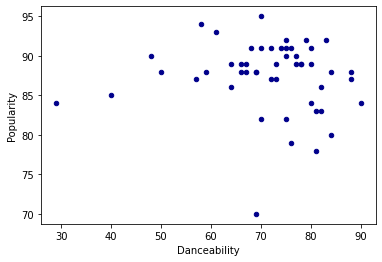

In [28]:
scatter_plot = top50.plot.scatter(x='Danceability', y='Popularity', c='DarkBlue')